In [1]:
import numpy as np
from collections import deque

GRAY, BLACK = 0, 1

In [2]:
#################################### UTILITY FUNCTIONS #########################################################3

class edge:
    def __init__(self,fro,to,rank=0,order='f',visit=False):
        self.fro=fro
        self.to=to
        self.rank=rank
        self.order=order
        self.visit=False

def num_edges(graph):
    sum=0
    for x in graph.values():
        sum+=len(x)
    return sum

def create_edges(graph):
    ed=[]
    for x in graph.keys():
        for y in graph[x]:
            e=edge(x,y)
            ed.append(e)
            
    return ed

def sorting_edges(ed):
    
    for i in range(len(ed)):
        for j in range(i+1,len(ed)):
            if ed[i].to > ed[j].to:
                ed[i],ed[j]=ed[j],ed[i]
            
    return ed

def edgess(ed,to,fro):
    for x in ed:
        if x.to == to and x.fro == fro:
            return False
    return True

def add_reverse_edges(T,ed):
    ed=[]
    
    vertices=list(T.keys())
    for x in range(len(vertices)):
        l=vertices[x]
        for y in T[l]:
            if edgess(ed,y,l):
                ed.append(edge(y,l,order='b')) 

                if y not in T:
                    T[y]=[l]
                else:
                    T[y].append(l)
    return ed,T

def visited(ed,to,fro):
    for x in ed:
        if x.to == to and x.fro == fro:
            return x.visit

def add_rank(ed,to,fro,rank):
    for x in ed:
        if x.to == to and x.fro == fro:
            x.visit=True
            x.rank=rank

def sorting_edges_by_rank(ed):
    
    for i in range(len(ed)):
        for j in range(i+1,len(ed)):
            if ed[i].rank > ed[j].rank:
                ed[i],ed[j]=ed[j],ed[i]
            
    return ed

def eller(root,adjancey,edd,rank):
    for x in adjancey[root]:
        if not visited(edd,x,root):
            add_rank(edd,x,root,rank)
            rank=rank+1
            eller(x,adjancey,edd,rank)
    return None

def satisfiededges(graph,v):
    g1={}
    m=0
    for x in graph:
        try:
            l=v[x]
            for y in graph[x]:
                o=v[y]
                if l < o:
                    m+=1
        except:
            None
    return m          

In [3]:
def OutTree(graph):
    vertices=sorted(list(graph.keys()))
    
    ed=create_edges(graph)
    
    ed=sorting_edges(ed)
    T={}
    s=vertices[0]
    v=vertices[0]
    i=0
    for edd in ed:
        x=edd.fro
        y=edd.to
        
        if y > v:
            if x not in T.keys():
                T[x]=[y]
            else:
                T[x].append(y)

            while v < y:
                
                i=i+1
                if i< len(vertices):
                    v=vertices[i]
                    if v < y:
                        if s ==1:
                            s=v
                        else:
                            if s not in T.keys():
                                T[s]=[v]
                            else:
                                T[s].append(v)
    return T,s
    
    

In [4]:
def EulerTour(T,root):
    ed=create_edges(T)
    ed1,T=add_reverse_edges(T,ed)
    ed.extend(ed1)
    rank=1
    try:
        eller(root,T,ed,rank)
    except:
        None
    ed=sorting_edges_by_rank(ed)
    
    return ed
    

In [5]:
def PreOrderNumberings(edges,s,graph): 
    Nl={s:1}
    Nr={s:1}
    l=2
    r=len(graph.keys())
    
    for ed in edges:
        if ed.order =='f':
            Nl[ed.to]=l
            l=l+1
        else:
            Nr[ed.fro]=r
            r=r-1
    return Nl,Nr
    

In [6]:
def InitialNumbering(graph):
    T,s=OutTree(graph)
    L=EulerTour(T,s)
    vl,vr=PreOrderNumberings(L,s,graph)
    ml=satisfiededges(graph,vl)
    mr=satisfiededges(graph,vr)
    if ml > mr:
       return (vl,ml)
    else:
       return (vr,mr)

In [7]:
def Staisfygraphedges(G,v):
    a = {k: v for k, v in sorted(G.items(), key=lambda item: item[1])}
    return a

In [8]:
def MAXIMALLYVIOLATEDOUTTREE(G, v):
    Queue = []
    start = 0
    for i in G:
        try:
            if(G[i]>G[i+1]):
                start = i
                break
        except:
            pass
        
    T = {}
    nx = False;
    for i in G:  
        if(start == i):
            nx = True
        if(nx == True):
            T[i]=G[i]
                
    return T,start

In [9]:
def satisfylocaledges(graph,v):
    order, enter, state = deque(), set(graph), {}

    def checkedges(node):
        state[node] = GRAY
        for k in graph.get(node, ()):
            sk = state.get(k, None)
            if sk == GRAY: raise ValueError("cycle")
            if sk == BLACK: continue
            enter.discard(k)
            checkedges(k)
        order.appendleft(node)
        state[node] = BLACK

    while enter: checkedges(enter.pop())
    return list(order)

In [10]:
def SATISFYPREVIOUSLYSATISFIEDEDGES(t,G,v):
    g = {}
    for i in G:
        if(v > i):
            g[i] = G[i]
            break
        
    for i in t:
        g[i]=t[i]
    return g,v

In [11]:
def IMPROVENUMBERING(G,v):
    T,v1 = MAXIMALLYVIOLATEDOUTTREE(G,v)
    T = Staisfygraphedges(T,v1)
    a,v2 = SATISFYPREVIOUSLYSATISFIEDEDGES(T,G,v)
    return a,v+1

In [35]:
def iterTS(graph):
    m=num_edges(graph)
    v,ms= InitialNumbering(graph)
    while ms < m:
        v, ms = IMPROVENUMBERING(graph,ms)
    v= Staisfygraphedges(v,ms)
    g = satisfylocaledges(graph,v)
    return g

In [36]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        dict_obj[key] = [value]

![Direct Acyclic Graph](dag.png)

In [37]:
# ############ TEST GRAPH ##########################333
graph={1:[2,3],2:[4,5],3:[6],4:[7],5:[7],6:[5,7],7:[]}
graph1={0:[],1:[],2:[3],3:[1],4:[0,1],5:[0,2]}
graph3={0:[1,2],1:[2,5],2:[3],3:[],4:[],5:[3,4],6:[1,5]}

In [38]:
def file(name):
    graph={}
    temp=open(name)
    line=temp.readlines()
    graph={}
    for i in line:
        i=i.strip()
        data=i.split('  ')
        append_value(graph,int(data[0]),int(data[1]))
    return graph

In [39]:
graph4 = file('file-1.txt') 

In [53]:
graph5 = file('graph0-WikiVote.txt') 

In [60]:
graph6 = file('graph1-WikiTalk.txt')

In [44]:
import time

In [45]:
times = []
start_time = time.time()
v1 = iterTS(graph)
times.append(time.time() - start_time)
start_time = time.time()

In [46]:
v2 = iterTS(graph1)
times.append(time.time() - start_time)
start_time = time.time()

In [47]:
v3 = iterTS(graph3)
times.append(time.time() - start_time)
start_time = time.time()


In [48]:
v4 = iterTS(graph4)
times.append(time.time() - start_time)
start_time = time.time()


In [54]:
v5 = iterTS(graph5)
times.append(time.time() - start_time)
start_time = time.time()


In [61]:
v6 = iterTS(graph6)
times.append(time.time() - start_time)
start_time = time.time()


In [76]:
number_of_node = [6*9,5*6,8*9,2000+10203,7115+103689,21000+311067]

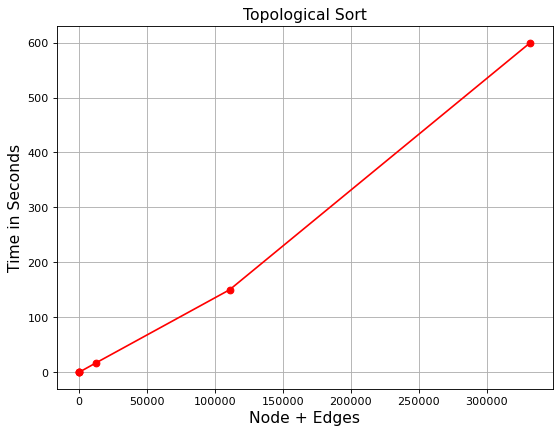

In [79]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
   
plt.plot(number_of_node, times, color='red', marker='o')
plt.title('Topological Sort', fontsize=14)
plt.xlabel('Node + Edges', fontsize=14)
plt.ylabel('Time in Seconds', fontsize=14)
plt.grid(True)
plt.show()

In [85]:
import json

with open('data4.txt', 'w') as f:
    for i in v4:
        f.write(str(i)+'\n')
with open('data5.txt', 'w') as f:
    for i in v5:
        f.write(str(i)+'\n')
with open('data6.txt', 'w') as f:
    for i in v6:
        f.write(str(i)+'\n')